Convert str to seconds

In [2]:
def hmstoseconds(value):
    parts=value.split(':')
    res = int(parts[0])*3600+int(parts[1])*60+float(parts[2])
    return res

Get the time of all algorithms

In [3]:
from matplotlib import pyplot as plt
from random import random

def compare3(dataset_name, location='../experiment_output_20230413_', max_risk=1, repeat=5, col=10, 
            max_length=30, title=None):
    test_risks={}
    train_risks={}
    and_counts={}
    aucs={}
    running_times={}
    file_numbers={}
    desc=dataset_name
    max_risk=get_max_risk(dataset_name)
    print(max_risk)
    objs = ['orth', 'gpe','xgb', 'mwg']
    for obj in objs:
        algos = ['fc'] if obj=='orth' else ['boosting'] if obj in ['gpe', 'mwg'] else ['keep']
        search =  'greedy'
        for algo in algos:
            methods = ['Newton-CG'] if algo=='fc' else ['']
            for method in methods:
                done = True
                fc_train=[0]*10
                fc_test=[0]*10
                ands = [0]*10
                file_number=0
                running_time=0
                for i in range(repeat):
                    filename = dataset_name + '_' + obj + '_' + algo + '_' + method + '_realkd_col_' + \
                        str(col) + '_rep' + str(i) + '.txt'
                    try:
                        f = open(location+search+'/'+dataset_name+'/'+filename, 'r')
                        file_number+=1
                    except:
                        print(obj, algo, method,'does not exist: ')
                        print(location+'_normalised/'+dataset_name+'/'+filename)
                        continue
                    j=-1
                    for line in f:
                        if 'iteration ' in line:
                            j+=1
                        if j>=10:
                            break
                        words=line.split(' ')
                        if 'Running time:' in line:
                            running_time += hmstoseconds(words[-1][5:])
                            print(words[-1][5:])
                        if 'fc train risk' in line:
                            fc_train[j] += float(words[-1])
                        elif 'fc test risk' in line:
                            fc_test[j] += float(words[-1])
                        if 'if' in line:
                            ands[j]+=line.count('=')+1
                if done:
                    file_numbers[obj + '_' + algo + '_' + method] = file_number
                    train_risks[obj + '_' + algo + '_' + method]=fc_train
                    test_risks[obj + '_' + algo + '_' + method]=fc_test
                    and_counts[obj + '_' + algo + '_' + method]=ands
                    running_times[obj + '_' + algo + '_' + method]=running_time/max(1, file_number)
                    if file_number==0:
                        continue
                    print(obj + '_' + algo + '_' + method+': avg train risk:',sum(fc_train)/10/max_risk/file_number, 
                          'avg test risk', sum(fc_test)/10/max_risk/file_number, '&s:', sum(ands)/10/file_number)

    rg=list(range(1,11))
    plt.figure(figsize=(8,6))
    colours = {}
    line_width = {}
    width = [1,1, 1, 1]*4
    i = 0
    colors=['blue','green','red','gold','deepskyblue','violet','cyan','brown','deepskyblue','purple', 'lime',
            'slategray','magenta','pink','olive','khaki']
    label_map={'gpe_boosting_':'Gradient Boosting', 'gpe_fc_Newton-CG': 'Gradient Fully-corrective Boosting', 
               'orth_fc_Newton-CG': 'Orthogonal Fully-corrective Boosting', 'xgb_keep_': 'XGBoost', 
              'xgb_fc_Newton-CG': 'XG Fully-corrective Boosting','mwg_boosting_': 'Gradient Descent'}
    for item in train_risks:
        color = colors[i]
        colours[item] = color
        line_width[item] = width[i]
        i+=1
        if file_numbers[item]==0:
            continue
        train_risks[item] = [risk / max_risk/file_numbers[item] for risk in train_risks[item]]
        test_risks[item] = [risk / max_risk/file_numbers[item] for risk in test_risks[item]]
        and_counts[item] = [ands / file_numbers[item] for ands in and_counts[item]]
        aucs[item] = and_counts[item][0]+sum((train_risks[item][m])*
                                             (min(max_length, and_counts[item][m+1])-
                                                                   min(max_length, and_counts[item][m]))
                                for m in range(len(train_risks[item])-1))
        print(item, 'auc:', aucs[item])
        print(and_counts[item], train_risks[item])
        print('running time:', item, dataset_name, running_times[item])
        plt.step([0]+and_counts[item], [1]+train_risks[item], '--', color=colours[item],
                 label=label_map[item],linewidth=line_width[item],where='post')
    plt.title(dataset_name if title is None else title + " risks")
    plt.xlabel('number of rules')
    plt.xlim(0,30)
    plt.ylabel('risk')
    plt.yscale('log')
#     plt.ylim(min_risk, 1.05)
    plt.grid(visible=True, which='major')
    plt.grid(visible=True, which='minor')
    plt.gca().set_ylim(bottom=0)
    plt.legend()
    plt.show()
    
    return train_risks, test_risks, and_counts, aucs, running_times

def get_max_risk(dataset_name):
    d = {'gdp': 43.986571428571416,
        'wage': 2029057842.6515312,
        'titanic': 1.0,
        'insurance': 322646873.58870494,
        'used_cars': 194464336.77843493,
        'tic_tac_toe': 1.0,
        'boston': 592.1469169960473,
        'world_happiness_indicator': 30.46778212179487,
        'Demographics': 31.64835409252669,
        'IBM_HR': 1.0, 'telco_churn': 1.0,
        'mobile_prices': 3.5,
        'GenderRecognition': 1.0,
        'breast_cancer': 1.0,
        'load_diabetes': 29074.481900452487,
        'iris': 1.0,
        'load_wine': 1.0,
         'suicide_rates_cleaned': 523.7783290690134,
         'videogamesales': 2.70680865164444,
         'digits5': 1.0,
         'red_wine_quality': 32.41651031894934, 
         'banknote': 1.0, 
         'liver': 1.0, 
         'magic': 1.0, 
         'adult': 1.0,
         'who_life_expectancy': 4882.764241803283,
         'vaccine': 228506505.50612897, 
         'ships': 12.342277392898044, 
         'smoking': 7.500299349437478, 
         'covid_vic': 51.62076805721374, 
         'covid_world': 14143.401514056353, 
         'covid': 1082.8170359400497, 
         'bicycle': 1076.416963882381, 
         'austin-water': 3975.767978495398,
         'make_friedman2': 379683.4049960418, 
         'make_friedman3': 1.8780821278399789, 
         'make_friedman1': 226.89125115757616
        }
    if dataset_name in d:
        return d[dataset_name]
    else:
        return 1

34
1.0
0:00:01.738647

0:00:01.742930

0:00:01.763016

0:00:01.743986

0:00:01.760260

orth_fc_Newton-CG: avg train risk: 0.6095025343760184 avg test risk 0.7163270331301919 &s: 21.72
0:00:01.666556

0:00:01.671756

0:00:01.668077

0:00:01.694442

0:00:01.670884

gpe_boosting_: avg train risk: 0.6118282572937578 avg test risk 0.6903799959890116 &s: 22.22
0:00:01.656358

0:00:01.617103

0:00:01.609035

0:00:01.619955

0:00:01.603877

xgb_keep_: avg train risk: 0.6271520305383194 avg test risk 0.6811907810282867 &s: 20.68
0:00:01.676157

0:00:01.662110

0:00:01.634766

0:00:01.677525

0:00:01.700353

mwg_boosting_: avg train risk: 0.6701061962540753 avg test risk 0.724370047177094 &s: 17.34
orth_fc_Newton-CG auc: 20.370753671931947
[4.2, 7.2, 9.6, 15.2, 18.8, 22.4, 27.6, 32.8, 37.6, 41.8] [0.7946625311163802, 0.6427524929031204, 0.6243868362496346, 0.60598999738364, 0.596179824455955, 0.5842654708779979, 0.5756675022621816, 0.5658997866264118, 0.5558566890900465, 0.5493642127948167]
runn

/tmp/ipykernel_649/2837697588.py:103: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.gca().set_ylim(bottom=0)


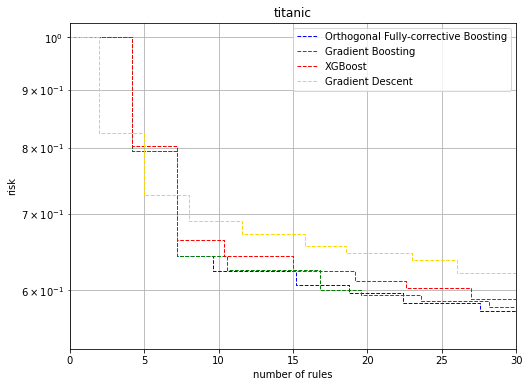

1
0:00:02.064718

0:00:02.058727

0:00:02.055575

0:00:02.078390

0:00:02.071894

orth_fc_Newton-CG: avg train risk: 0.627370388891923 avg test risk 0.7199766253827009 &s: 23.54
0:00:01.833066

0:00:01.865227

0:00:01.859755

0:00:01.847557

0:00:01.844735

gpe_boosting_: avg train risk: 0.6351372504701496 avg test risk 0.7192877625452025 &s: 22.6
0:00:01.769352

0:00:01.781679

0:00:01.799541

0:00:01.795415

0:00:01.765239

xgb_keep_: avg train risk: 0.6681196468981964 avg test risk 0.7397052827573535 &s: 20.7
0:00:01.812399

0:00:01.819186

0:00:01.833379

0:00:01.809770

0:00:01.831372

mwg_boosting_: avg train risk: 0.8025141146166128 avg test risk 0.8505754186780787 &s: 13.580000000000002
orth_fc_Newton-CG auc: 22.045073979798243
[2.0, 5.8, 11.2, 16.4, 21.6, 24.8, 30.4, 36.2, 41.2, 45.8] [0.8612646072238814, 0.8268728019885938, 0.7403436593653486, 0.6780853802630411, 0.6146644863146866, 0.5700765344873964, 0.5434305461948346, 0.5062726976355231, 0.476996626662364, 0.4556965487835

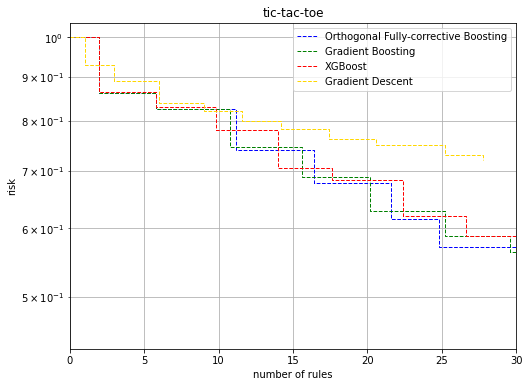

1.0
0:00:00.440346

0:00:00.414045

0:00:00.430606

0:00:00.411042

0:00:00.456523

orth_fc_Newton-CG: avg train risk: 0.2177602761665564 avg test risk 0.4277608764901273 &s: 17.84
0:00:00.415336

0:00:00.418548

0:00:00.415192

0:00:00.411982

0:00:00.419874

gpe_boosting_: avg train risk: 0.22036509226382725 avg test risk 0.42348306061757224 &s: 21.02
0:00:00.396407

0:00:00.375567

0:00:00.373063

0:00:00.374123

0:00:00.370426

xgb_keep_: avg train risk: 0.31831702965128106 avg test risk 0.40830368379088944 &s: 15.14
0:00:00.425406

0:00:00.416771

0:00:00.415345

0:00:00.430647

0:00:00.411056

mwg_boosting_: avg train risk: 0.2903016493274525 avg test risk 0.41164950224126295 &s: 16.259999999999998
orth_fc_Newton-CG auc: 8.862908029985007
[2.8, 4.8, 8.2, 10.6, 14.8, 17.8, 22.8, 27.6, 32.4, 36.6] [0.6986609290305579, 0.46849885626233156, 0.23319829100253803, 0.18497308813752703, 0.14923884760312373, 0.11788880721809916, 0.1012526296859888, 0.08873082943985248, 0.0729075535360869, 

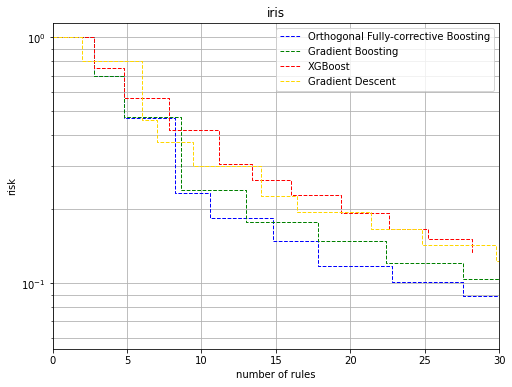

1.0
0:00:03.489331

0:00:03.506243

0:00:03.476050

0:00:03.481546

0:00:03.500353

orth_fc_Newton-CG: avg train risk: 0.24837246753883085 avg test risk 0.2797946816177995 &s: 24.18
0:00:03.555363

0:00:03.558686

0:00:03.565892

0:00:03.567028

0:00:03.512918

gpe_boosting_: avg train risk: 0.25412899343025164 avg test risk 0.25588781636045255 &s: 22.72
0:00:03.581809

0:00:03.492394

0:00:03.495380

0:00:03.494473

0:00:03.487988

xgb_keep_: avg train risk: 0.2893418475020795 avg test risk 0.2789331320403429 &s: 21.0
0:00:03.542281

0:00:03.534958

0:00:03.520877

0:00:03.521179

0:00:03.517655

mwg_boosting_: avg train risk: 0.2719944165608358 avg test risk 0.22270375293239572 &s: 16.8
orth_fc_Newton-CG auc: 10.764485782605417
[2.0, 7.6, 10.6, 14.4, 20.2, 25.4, 30.2, 37.6, 45.0, 48.8] [0.5837924450570858, 0.32029422517734163, 0.27132492278022347, 0.24662865000640305, 0.22231160002245928, 0.19931830826846447, 0.18589328865193935, 0.16894257028641957, 0.14660531542856978, 0.1386133497

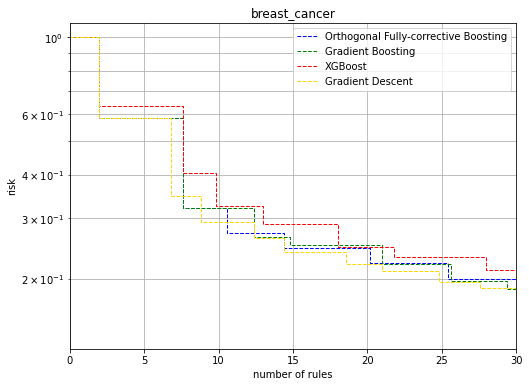

1.0
0:00:00.852529

0:00:00.835121

0:00:00.811925

0:00:00.819855

0:00:00.820111

orth_fc_Newton-CG: avg train risk: 0.16587299276359863 avg test risk 0.40181539123046245 &s: 20.18
0:00:00.888176

0:00:00.873339

0:00:00.874205

0:00:00.899061

0:00:00.874320

gpe_boosting_: avg train risk: 0.18205276360406017 avg test risk 0.4177380909961877 &s: 22.6
0:00:00.830453

0:00:00.848104

0:00:00.825720

0:00:00.835670

0:00:00.828081

xgb_keep_: avg train risk: 0.22718680448926634 avg test risk 0.3266754687218598 &s: 18.68
0:00:00.858231

0:00:00.859622

0:00:00.883093

0:00:00.870161

0:00:00.863114

mwg_boosting_: avg train risk: 0.20337040637959808 avg test risk 0.3231462239949459 &s: 16.14
orth_fc_Newton-CG auc: 9.162234727945023
[3.8, 6.8, 11.2, 15.2, 19.0, 22.2, 24.8, 29.4, 32.4, 37.0] [0.5498129218032897, 0.29400421454242354, 0.2042181734556526, 0.15224971990365638, 0.11523341288614139, 0.09382594673630802, 0.08098292183186127, 0.064233276525617, 0.05741442337134371, 0.046754916579

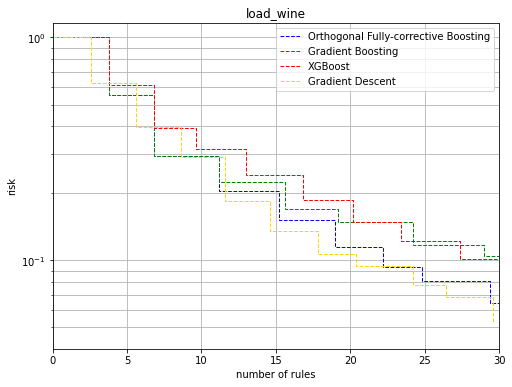

1.0
0:00:05.011335

0:00:04.869426

0:00:04.967553

0:00:05.180938

0:00:06.129976

orth_fc_Newton-CG: avg train risk: 0.5691654952825698 avg test risk 0.6082029265116804 &s: 11.459999999999999
0:00:04.706321

0:00:04.731132

0:00:04.723585

0:00:04.706412

0:00:04.734392

gpe_boosting_: avg train risk: 0.575707619298065 avg test risk 0.6197237788980794 &s: 11.34
0:00:04.608454

0:00:04.620375

0:00:04.645353

0:00:04.660749

0:00:04.668667

xgb_keep_: avg train risk: 0.5880190116866045 avg test risk 0.6261400435879946 &s: 11.4
0:00:04.837931

0:00:04.885262

0:00:04.937669

0:00:04.902144

0:00:04.875401

mwg_boosting_: avg train risk: 0.5871492884950891 avg test risk 0.6059385983152414 &s: 8.92
orth_fc_Newton-CG auc: 6.347185170822989
[1.0, 3.0, 5.4, 7.8, 10.0, 12.0, 15.0, 17.6, 20.2, 22.6] [0.6324112983795195, 0.597392455495398, 0.5800204781757289, 0.5711688787514755, 0.5631984027221246, 0.5579165457807332, 0.552946311678377, 0.5490639017103774, 0.5450163527306966, 0.542520327401265

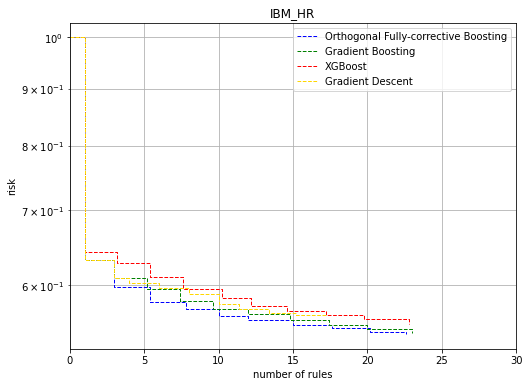

1.0
0:00:38.258003

orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/telco_churn/telco_churn_orth_fc_Newton-CG_realkd_col_4_rep1.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/telco_churn/telco_churn_orth_fc_Newton-CG_realkd_col_4_rep2.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/telco_churn/telco_churn_orth_fc_Newton-CG_realkd_col_4_rep3.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/telco_churn/telco_churn_orth_fc_Newton-CG_realkd_col_4_rep4.txt
orth_fc_Newton-CG: avg train risk: 0.6681649799604733 avg test risk 0.6528643679113946 &s: 17.0
0:00:23.322190

gpe boosting  does not exist: 
../experiment_output_20230413__normalised/telco_churn/telco_churn_gpe_boosting__realkd_col_4_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230413__normalised/telco_churn/telco_churn_gpe_boosting__realkd_col_4_rep2.txt
gpe boosting  does not exist: 
../expe

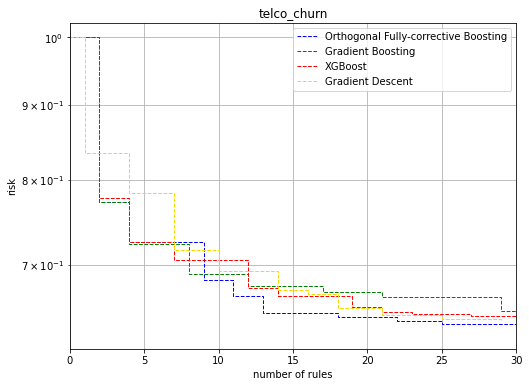

1.0
0:00:08.440695

orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/GenderRecognition/GenderRecognition_orth_fc_Newton-CG_realkd_col_3_rep1.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/GenderRecognition/GenderRecognition_orth_fc_Newton-CG_realkd_col_3_rep2.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/GenderRecognition/GenderRecognition_orth_fc_Newton-CG_realkd_col_3_rep3.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/GenderRecognition/GenderRecognition_orth_fc_Newton-CG_realkd_col_3_rep4.txt
orth_fc_Newton-CG: avg train risk: 0.9968626792532731 avg test risk 0.9985547179633809 &s: 11.0
0:00:06.634215

gpe boosting  does not exist: 
../experiment_output_20230413__normalised/GenderRecognition/GenderRecognition_gpe_boosting__realkd_col_3_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230413__normalised/GenderRecognition/GenderRecognition_gp

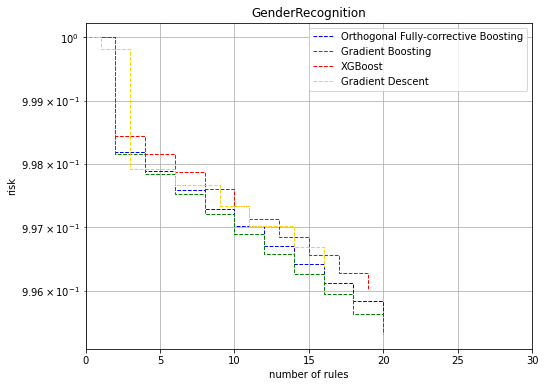

1.0
0:00:03.113083

0:00:03.045555

0:00:03.028929

0:00:03.026917

0:00:03.000541

orth_fc_Newton-CG: avg train risk: 0.23369139534123962 avg test risk 0.25058036868706923 &s: 22.4
0:00:02.864085

0:00:02.886551

0:00:02.894198

0:00:02.872650

0:00:02.883418

gpe_boosting_: avg train risk: 0.256787779768445 avg test risk 0.270799438926478 &s: 22.0
0:00:02.801742

0:00:02.791702

0:00:02.791256

0:00:02.765235

0:00:02.808232

xgb_keep_: avg train risk: 0.32485072006086757 avg test risk 0.34091751641697954 &s: 18.2
0:00:02.859529

0:00:02.857328

0:00:02.863170

0:00:02.857046

0:00:02.860829

mwg_boosting_: avg train risk: 0.33333281339211274 avg test risk 0.3508743123387711 &s: 16.18
orth_fc_Newton-CG auc: 10.691229882632568
[2.0, 5.0, 10.4, 16.2, 20.8, 26.4, 30.6, 33.4, 37.6, 41.6] [0.7024743018761679, 0.4308200277297833, 0.34047705667510453, 0.21577091284562094, 0.14906855464091578, 0.12646716485240067, 0.10775283949827168, 0.09867414941513, 0.08622757068106796, 0.0791813751979332

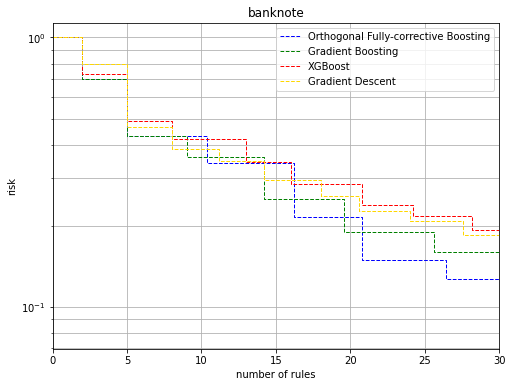

1.0
0:00:01.361817

0:00:01.341143

orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/liver/liver_orth_fc_Newton-CG_realkd_col_10_rep2.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/liver/liver_orth_fc_Newton-CG_realkd_col_10_rep3.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/liver/liver_orth_fc_Newton-CG_realkd_col_10_rep4.txt
orth_fc_Newton-CG: avg train risk: 0.7598539914905703 avg test risk 0.95443047633385 &s: 27.5
0:00:01.239977

0:00:01.228649

gpe boosting  does not exist: 
../experiment_output_20230413__normalised/liver/liver_gpe_boosting__realkd_col_10_rep2.txt
gpe boosting  does not exist: 
../experiment_output_20230413__normalised/liver/liver_gpe_boosting__realkd_col_10_rep3.txt
gpe boosting  does not exist: 
../experiment_output_20230413__normalised/liver/liver_gpe_boosting__realkd_col_10_rep4.txt
gpe_boosting_: avg train risk: 0.7585280514379049 avg test risk 1.0009213123859804

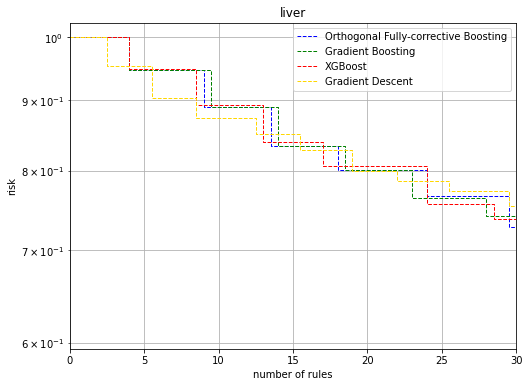

1.0
0:02:26.051569

orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/magic/magic_orth_fc_Newton-CG_realkd_col_5_rep1.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/magic/magic_orth_fc_Newton-CG_realkd_col_5_rep2.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/magic/magic_orth_fc_Newton-CG_realkd_col_5_rep3.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/magic/magic_orth_fc_Newton-CG_realkd_col_5_rep4.txt
orth_fc_Newton-CG: avg train risk: 0.7041737331520886 avg test risk 0.683884819793822 &s: 20.6
0:00:39.996578

gpe boosting  does not exist: 
../experiment_output_20230413__normalised/magic/magic_gpe_boosting__realkd_col_5_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230413__normalised/magic/magic_gpe_boosting__realkd_col_5_rep2.txt
gpe boosting  does not exist: 
../experiment_output_20230413__normalised/magic/magic_gpe_boosting__realkd_col_5

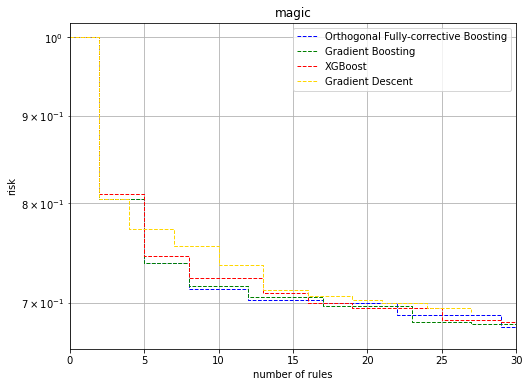

1.0
0:05:58.469427

orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/adult/adult_orth_fc_Newton-CG_realkd_col_5_rep1.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/adult/adult_orth_fc_Newton-CG_realkd_col_5_rep2.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/adult/adult_orth_fc_Newton-CG_realkd_col_5_rep3.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/adult/adult_orth_fc_Newton-CG_realkd_col_5_rep4.txt
orth_fc_Newton-CG: avg train risk: 0.5745407325209568 avg test risk 0.5863465431867918 &s: 12.4
0:00:56.536252

gpe boosting  does not exist: 
../experiment_output_20230413__normalised/adult/adult_gpe_boosting__realkd_col_5_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230413__normalised/adult/adult_gpe_boosting__realkd_col_5_rep2.txt
gpe boosting  does not exist: 
../experiment_output_20230413__normalised/adult/adult_gpe_boosting__realkd_col_

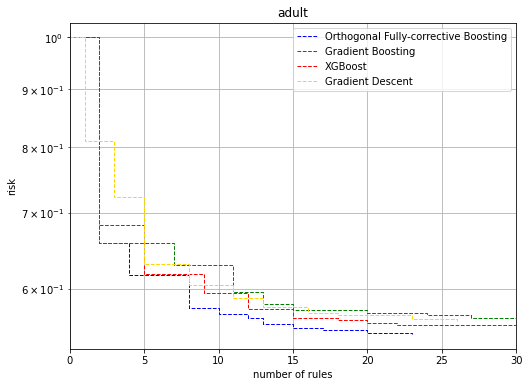

1.0
0:00:39.722156

orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/digits5/digits5_orth_fc_Newton-CG_realkd_col_3_rep1.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/digits5/digits5_orth_fc_Newton-CG_realkd_col_3_rep2.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/digits5/digits5_orth_fc_Newton-CG_realkd_col_3_rep3.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/digits5/digits5_orth_fc_Newton-CG_realkd_col_3_rep4.txt
orth_fc_Newton-CG: avg train risk: 0.3457338926966843 avg test risk 0.3332861844185078 &s: 12.9
0:00:33.662552

gpe boosting  does not exist: 
../experiment_output_20230413__normalised/digits5/digits5_gpe_boosting__realkd_col_3_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230413__normalised/digits5/digits5_gpe_boosting__realkd_col_3_rep2.txt
gpe boosting  does not exist: 
../experiment_output_20230413__normalised/digits5/digit

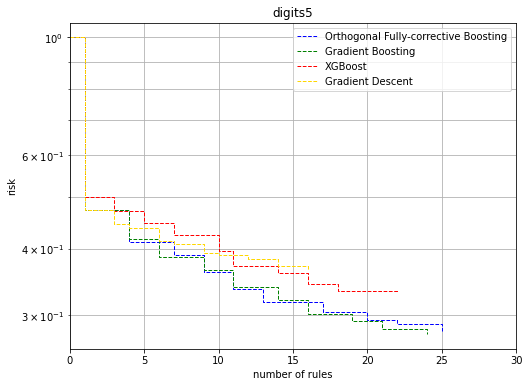

322646873.58870494
0:00:02.757226

0:00:02.769028

0:00:02.768537

0:00:02.770653

0:00:02.783848

orth_fc_Newton-CG: avg train risk: 0.11858686598326036 avg test risk 0.11406342356828418 &s: 13.419999999999998
0:00:02.908814

0:00:02.861186

0:00:02.874314

0:00:02.883503

0:00:02.863460

gpe_boosting_: avg train risk: 0.12787269311388316 avg test risk 0.11924228916207555 &s: 17.16
0:00:02.816004

0:00:02.838898

0:00:02.809738

0:00:02.818120

0:00:02.912994

xgb_keep_: avg train risk: 0.12787269348558744 avg test risk 0.11924229268987721 &s: 17.16
0:00:02.869541

0:00:02.877641

0:00:02.851937

0:00:02.856603

0:00:02.866573

mwg_boosting_: avg train risk: 0.18325283196411737 avg test risk 0.16979881308874178 &s: 11.34
orth_fc_Newton-CG auc: 4.9562206647860325
[2.0, 4.0, 7.0, 8.8, 10.6, 12.8, 15.8, 20.0, 24.6, 28.6] [0.35013207679530217, 0.16442532141363891, 0.1224694705017559, 0.09233210365589536, 0.08296178186391613, 0.07958772922308292, 0.07716449123756822, 0.07471783798014073, 0

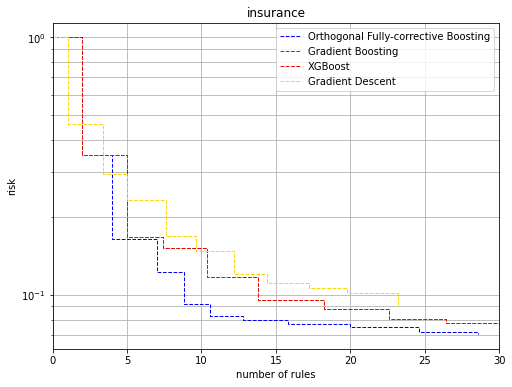

226.89125115757616
0:00:01.434466

0:00:01.429058

0:00:01.438342

0:00:01.453809

0:00:01.427551

orth_fc_Newton-CG: avg train risk: 0.050544025189846645 avg test risk 0.055121906453613846 &s: 17.46
0:00:01.176280

0:00:01.176329

0:00:01.152323

0:00:01.178675

0:00:01.179535

gpe_boosting_: avg train risk: 0.05951579683547527 avg test risk 0.06371494856739308 &s: 16.7
0:00:01.134721

0:00:01.122676

0:00:01.139555

0:00:01.138195

0:00:01.119013

xgb_keep_: avg train risk: 0.0588836999195599 avg test risk 0.0629466377070815 &s: 15.9
0:00:01.161364

0:00:01.158574

0:00:01.134683

0:00:01.160627

0:00:01.160244

mwg_boosting_: avg train risk: 0.06097159473590495 avg test risk 0.06163287383977582 &s: 10.16
orth_fc_Newton-CG auc: 4.774044389079507
[3.4, 6.4, 9.0, 12.0, 15.2, 18.8, 23.2, 25.8, 29.0, 31.8] [0.08292477648782573, 0.06305512811511713, 0.05607036232182498, 0.04928385398908343, 0.04437411951191593, 0.0432651279875407, 0.04227953532448841, 0.04188935648064274, 0.04132118081638

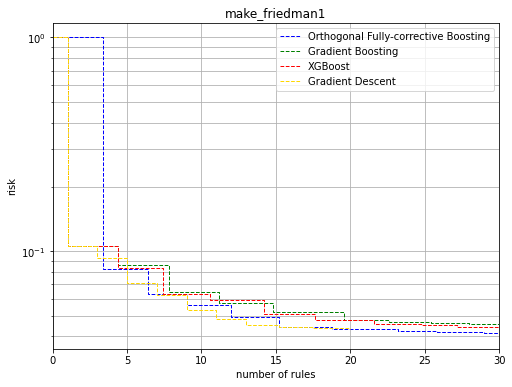

379683.4049960418
0:00:05.365835

0:00:05.278173

0:00:05.254164

0:00:05.379601

0:00:05.434993

orth_fc_Newton-CG: avg train risk: 0.0640954417162988 avg test risk 0.06619521595834495 &s: 16.259999999999998
0:00:05.103349

0:00:05.148529

0:00:05.106100

0:00:05.109860

0:00:05.124822

gpe_boosting_: avg train risk: 0.08456773878131998 avg test risk 0.08553780701737448 &s: 17.880000000000003
0:00:04.998354

0:00:05.003396

0:00:05.023210

0:00:05.035243

0:00:05.012744

xgb_keep_: avg train risk: 0.08456774452509107 avg test risk 0.08553781395625247 &s: 17.880000000000003
0:00:05.061246

0:00:05.129631

0:00:05.092298

0:00:05.088755

0:00:05.083668

mwg_boosting_: avg train risk: 0.11444404450585652 avg test risk 0.11717588604878815 &s: 12.58
orth_fc_Newton-CG auc: 4.253726005437734
[2.4, 5.2, 8.0, 11.6, 14.6, 17.6, 21.4, 24.0, 27.2, 30.6] [0.24657615297988977, 0.11015102412800688, 0.07895496313440031, 0.049666001617948964, 0.04038992757203589, 0.029176817113650007, 0.02445888697263

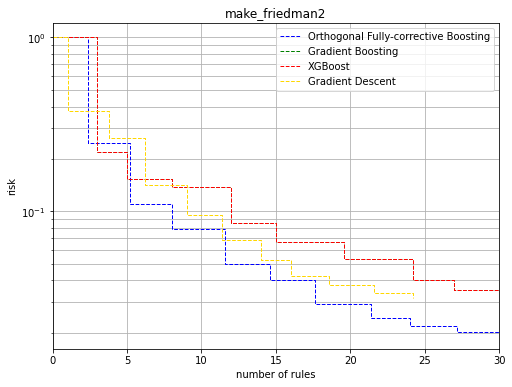

1.8780821278399789
0:00:02.787585

0:00:02.766657

0:00:02.779213

0:00:02.790604

0:00:02.752784

orth_fc_Newton-CG: avg train risk: 0.021190783252994547 avg test risk 0.024222804623452478 &s: 20.16
0:00:02.611230

0:00:02.608595

0:00:02.593348

0:00:02.613858

0:00:02.589638

gpe_boosting_: avg train risk: 0.025498601459763615 avg test risk 0.02837615112238844 &s: 16.880000000000003
0:00:02.560387

0:00:02.558479

0:00:02.566659

0:00:02.538547

0:00:02.561705

xgb_keep_: avg train risk: 0.025498599689957047 avg test risk 0.028376145694561445 &s: 16.880000000000003
0:00:02.600613

0:00:02.589695

0:00:02.596031

0:00:02.596574

0:00:02.584852

mwg_boosting_: avg train risk: 0.028446924484987472 avg test risk 0.03058746373772419 &s: 14.0
orth_fc_Newton-CG auc: 4.589060268337214
[4.0, 7.0, 11.0, 14.6, 17.8, 21.0, 25.2, 29.4, 33.8, 37.8] [0.03381021541861172, 0.027092097791144097, 0.02352902293948628, 0.021257354561394597, 0.019563871349693358, 0.018596569048080016, 0.01795373029107237

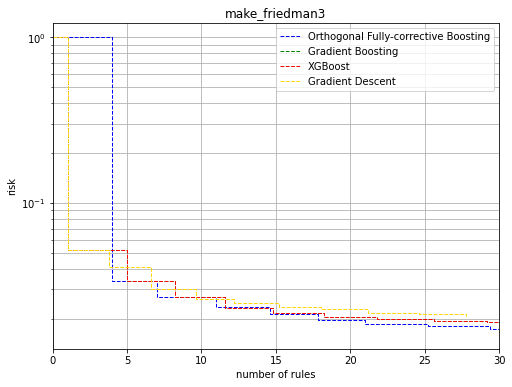

2029057842.6515312
0:00:02.902263

0:00:02.787154

0:00:02.794969

0:00:02.798755

0:00:02.822011

orth_fc_Newton-CG: avg train risk: 0.341003807319073 avg test risk 0.36983415361636696 &s: 20.86
0:00:02.939477

0:00:02.915841

0:00:02.938824

0:00:02.922159

0:00:02.913018

gpe_boosting_: avg train risk: 0.3535497401248422 avg test risk 0.3841759259554974 &s: 21.32
0:00:02.889484

0:00:02.886085

0:00:02.860517

0:00:02.875657

0:00:02.860125

xgb_keep_: avg train risk: 0.3535497357355618 avg test risk 0.3841759224870588 &s: 21.32
0:00:02.941788

0:00:02.884276

0:00:02.907939

0:00:02.905497

0:00:02.883371

mwg_boosting_: avg train risk: 0.3741585039939354 avg test risk 0.3761423186887246 &s: 14.419999999999998
orth_fc_Newton-CG auc: 11.584285742929929
[1.0, 4.0, 10.6, 14.4, 19.0, 23.4, 27.6, 32.0, 36.2, 40.4] [0.4842848835817179, 0.41567651303032854, 0.36186720517693244, 0.3359044274328245, 0.32293326782857473, 0.3128099424760317, 0.30541759311508737, 0.29379720956905564, 0.2909603

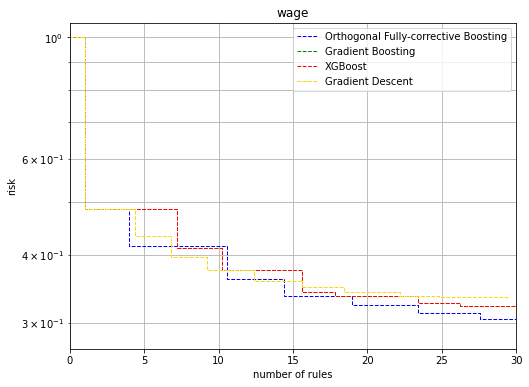

31.64835409252669
0:00:26.983745

0:00:29.881739

0:00:25.272048

0:00:27.500464

0:00:30.671807

orth_fc_Newton-CG: avg train risk: 0.20070314215529544 avg test risk 0.20379840810547348 &s: 12.440000000000001
0:00:10.729070

0:00:10.653440

0:00:10.735311

0:00:10.674401

0:00:10.709748

gpe_boosting_: avg train risk: 0.20248728713858863 avg test risk 0.2058680134768569 &s: 12.16
0:00:10.403157

0:00:10.420284

0:00:10.467927

0:00:10.439242

0:00:10.409732

xgb_keep_: avg train risk: 0.2024872853402626 avg test risk 0.2058680087511091 &s: 12.16
0:00:10.602630

0:00:10.583900

0:00:10.604736

0:00:10.568201

0:00:10.569608

mwg_boosting_: avg train risk: 0.20624130582353736 avg test risk 0.20870598795254663 &s: 8.24
orth_fc_Newton-CG auc: 5.912354197146144
[1.0, 3.0, 5.0, 7.0, 10.8, 13.4, 16.6, 19.6, 22.4, 25.6] [0.2424067272009615, 0.20866226506646207, 0.19994798507212633, 0.19721781193538773, 0.195115639479818, 0.19380858788210412, 0.19316102995759335, 0.19243903974120696, 0.1922162

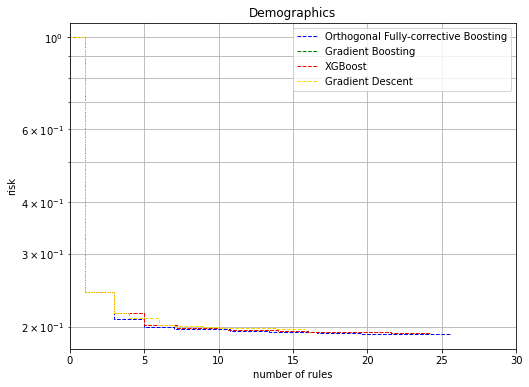

43.986571428571416
0:00:00.091729

0:00:00.082373

0:00:00.088436

0:00:00.081926

0:00:00.085310

orth_fc_Newton-CG: avg train risk: 0.004427575191734507 avg test risk 0.0057340892037899185 &s: 11.98
0:00:00.086393

0:00:00.090231

0:00:00.089655

0:00:00.089842

0:00:00.088572

gpe_boosting_: avg train risk: 0.00494734063834158 avg test risk 0.005972694150248067 &s: 11.84
0:00:00.066659

0:00:00.068773

0:00:00.073282

0:00:00.071816

0:00:00.074086

xgb_keep_: avg train risk: 0.004947341728292498 avg test risk 0.005972691250093744 &s: 11.84
0:00:00.089780

0:00:00.094059

0:00:00.089620

0:00:00.088421

0:00:00.092025

mwg_boosting_: avg train risk: 0.005081258050224734 avg test risk 0.005960781311776069 &s: 11.28
orth_fc_Newton-CG auc: 1.097583752934581
[1.0, 3.0, 5.8, 8.6, 11.0, 13.2, 15.6, 18.0, 20.4, 23.2] [0.01186360447669094, 0.004592890594624891, 0.003882397289800848, 0.0036598600172217345, 0.003515566844791282, 0.0034275708062324987, 0.0033679631955710956, 0.0033355051211173

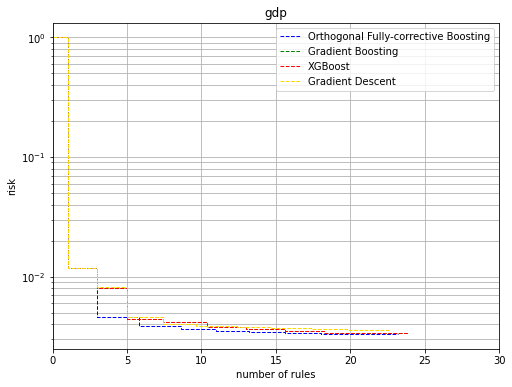

194464336.77843493
0:00:04.007121

0:00:03.947425

0:00:03.821484

0:00:03.982377

0:00:03.981264

orth_fc_Newton-CG: avg train risk: 0.09947860524465535 avg test risk 0.10522496527023598 &s: 15.419999999999998
0:00:03.781115

0:00:03.732677

0:00:03.572610

0:00:03.759004

0:00:03.740486

gpe_boosting_: avg train risk: 0.1377526564790718 avg test risk 0.14791581221741226 &s: 19.48
0:00:03.671833

0:00:03.671151

0:00:03.501589

0:00:03.651756

0:00:03.702567

xgb_keep_: avg train risk: 0.1377526644560746 avg test risk 0.14791582283787003 &s: 19.48
0:00:03.710039

0:00:03.728726

0:00:03.557798

0:00:03.742224

0:00:03.708763

mwg_boosting_: avg train risk: 0.1396373214972474 avg test risk 0.14733215128258506 &s: 14.52
orth_fc_Newton-CG auc: 5.661394553574896
[3.0, 5.8, 8.6, 10.6, 13.8, 16.8, 18.8, 22.2, 25.6, 29.0] [0.2684135938835004, 0.1816661070604762, 0.11195060195862705, 0.09029525280847783, 0.07295000873902142, 0.06301822920078198, 0.057620560793787565, 0.052996974817639354, 0.0

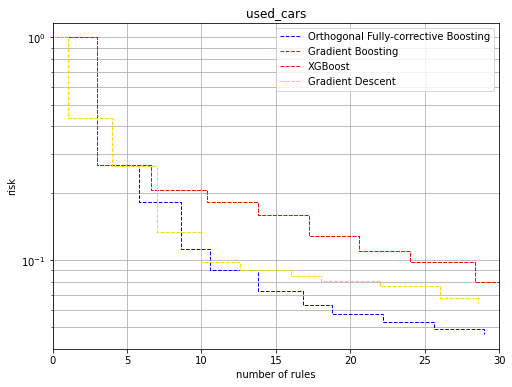

29074.481900452487
0:00:01.270198

0:00:01.275012

0:00:01.278326

0:00:01.272649

0:00:01.265059

orth_fc_Newton-CG: avg train risk: 0.11521715370806307 avg test risk 0.13173292199830858 &s: 20.380000000000003
0:00:01.000469

0:00:01.002702

0:00:00.981929

0:00:01.006986

0:00:00.998625

gpe_boosting_: avg train risk: 0.12620481335883152 avg test risk 0.13600096100818485 &s: 16.740000000000002
0:00:00.970624

0:00:00.953673

0:00:00.971989

0:00:00.974761

0:00:01.001519

xgb_keep_: avg train risk: 0.12620481290956526 avg test risk 0.13600096158927483 &s: 16.740000000000002
0:00:00.966467

0:00:00.991500

0:00:00.964304

0:00:00.988549

0:00:00.967661

mwg_boosting_: avg train risk: 0.13254107100439527 avg test risk 0.13998244843776114 &s: 11.879999999999999
orth_fc_Newton-CG auc: 6.756697407198109
[3.6, 6.8, 10.0, 15.0, 18.6, 22.0, 24.8, 30.2, 35.0, 37.8] [0.16108320625929035, 0.12463475684094463, 0.1186149215859911, 0.11380099260039589, 0.11097852495121932, 0.10878362260873402, 0.1

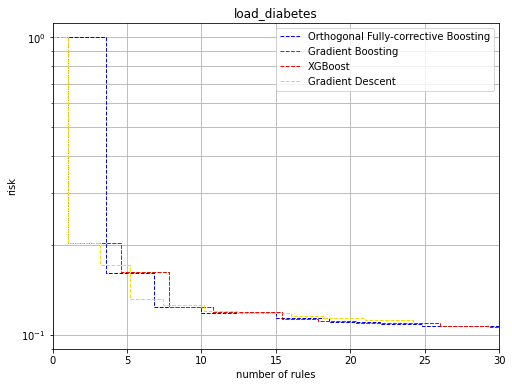

592.1469169960473
0:00:01.593072

0:00:01.603441

0:00:01.645580

0:00:01.612488

0:00:01.657243

orth_fc_Newton-CG: avg train risk: 0.07138163407865658 avg test risk 0.06297254338640251 &s: 16.48
0:00:01.464188

0:00:01.449671

0:00:01.466412

0:00:01.443644

0:00:01.474772

gpe_boosting_: avg train risk: 0.0761948947360731 avg test risk 0.06907664680217467 &s: 18.6
0:00:01.407832

0:00:01.432751

0:00:01.403954

0:00:01.446914

0:00:01.436659

xgb_keep_: avg train risk: 0.07603838246518677 avg test risk 0.0690293749313606 &s: 18.54
0:00:01.451238

0:00:01.424519

0:00:01.444215

0:00:01.445396

0:00:01.425909

mwg_boosting_: avg train risk: 0.08425138997844031 avg test risk 0.06773754516576595 &s: 11.4
orth_fc_Newton-CG auc: 3.0887536983706765
[1.0, 3.4, 6.4, 10.8, 15.0, 18.0, 21.4, 26.0, 29.4, 33.4] [0.1490775557495277, 0.0869962971296108, 0.07538428974254921, 0.0666972716422971, 0.06043671727355038, 0.05833363589063327, 0.05646470063169453, 0.054927950076229214, 0.05337015067389119

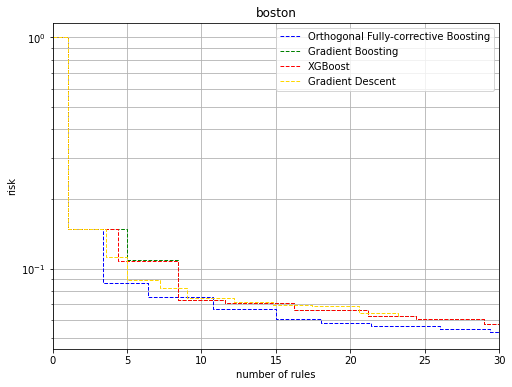

30.46778212179487
0:00:00.570716

0:00:00.547296

0:00:00.560875

0:00:00.549027

0:00:00.568950

orth_fc_Newton-CG: avg train risk: 0.012031507334620922 avg test risk 0.01603282046005226 &s: 16.3
0:00:00.572822

0:00:00.597991

0:00:00.569110

0:00:00.571946

0:00:00.565742

gpe_boosting_: avg train risk: 0.013586376828277572 avg test risk 0.019595460882036494 &s: 17.48
0:00:00.561699

0:00:00.562189

0:00:00.568259

0:00:00.546947

0:00:00.540763

xgb_keep_: avg train risk: 0.013586376801920893 avg test risk 0.019595465030519146 &s: 17.48
0:00:00.555907

0:00:00.555744

0:00:00.558219

0:00:00.560782

0:00:00.578800

mwg_boosting_: avg train risk: 0.015452173129153406 avg test risk 0.016526862111264425 &s: 12.48
orth_fc_Newton-CG auc: 1.363531543042149
[1.0, 4.2, 6.4, 10.0, 13.2, 16.2, 21.0, 25.0, 30.6, 35.4] [0.04058419814681026, 0.018386769719824603, 0.012058174481589443, 0.009580453009684058, 0.008379701577700339, 0.007500927428195424, 0.006719237329817283, 0.0062247664232645645, 

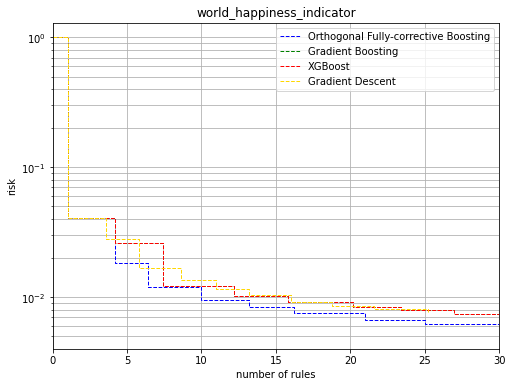

4882.764241803283
0:00:06.035133

orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/who_life_expectancy/who_life_expectancy_orth_fc_Newton-CG_realkd_col_5_rep1.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/who_life_expectancy/who_life_expectancy_orth_fc_Newton-CG_realkd_col_5_rep2.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/who_life_expectancy/who_life_expectancy_orth_fc_Newton-CG_realkd_col_5_rep3.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/who_life_expectancy/who_life_expectancy_orth_fc_Newton-CG_realkd_col_5_rep4.txt
orth_fc_Newton-CG: avg train risk: 0.006081909401575875 avg test risk 0.006955588214686209 &s: 21.1
0:00:06.713665

gpe boosting  does not exist: 
../experiment_output_20230413__normalised/who_life_expectancy/who_life_expectancy_gpe_boosting__realkd_col_5_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230413__normalised/

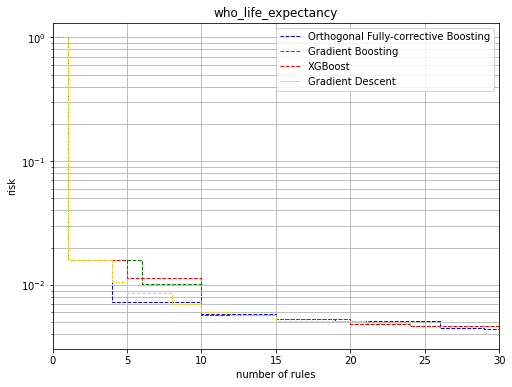

3.5
0:00:06.522999

orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/mobile_prices/mobile_prices_orth_fc_Newton-CG_realkd_col_4_rep1.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/mobile_prices/mobile_prices_orth_fc_Newton-CG_realkd_col_4_rep2.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/mobile_prices/mobile_prices_orth_fc_Newton-CG_realkd_col_4_rep3.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/mobile_prices/mobile_prices_orth_fc_Newton-CG_realkd_col_4_rep4.txt
orth_fc_Newton-CG: avg train risk: 0.10519667444852623 avg test risk 0.11138926543262652 &s: 18.3
0:00:07.280765

gpe boosting  does not exist: 
../experiment_output_20230413__normalised/mobile_prices/mobile_prices_gpe_boosting__realkd_col_4_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230413__normalised/mobile_prices/mobile_prices_gpe_boosting__realkd_col_4_rep2.txt
gpe boosting

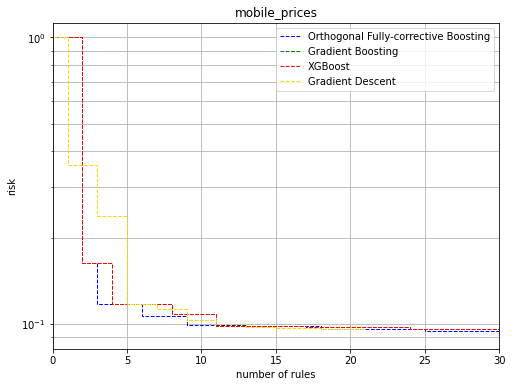

523.7783290690134
0:03:58.523028

orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/suicide_rates_cleaned/suicide_rates_cleaned_orth_fc_Newton-CG_realkd_col_3_rep1.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/suicide_rates_cleaned/suicide_rates_cleaned_orth_fc_Newton-CG_realkd_col_3_rep2.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/suicide_rates_cleaned/suicide_rates_cleaned_orth_fc_Newton-CG_realkd_col_3_rep3.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/suicide_rates_cleaned/suicide_rates_cleaned_orth_fc_Newton-CG_realkd_col_3_rep4.txt
orth_fc_Newton-CG: avg train risk: 0.5351745929810654 avg test risk 0.5130996542190742 &s: 11.9
0:00:32.273284

gpe boosting  does not exist: 
../experiment_output_20230413__normalised/suicide_rates_cleaned/suicide_rates_cleaned_gpe_boosting__realkd_col_3_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230

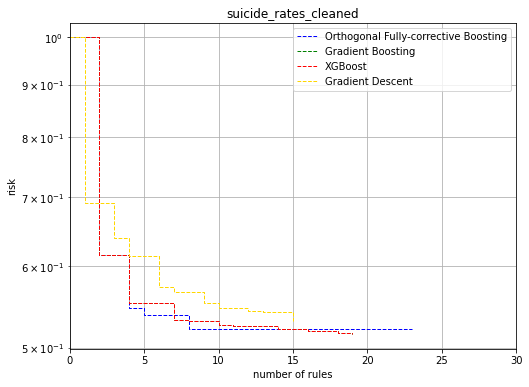

2.70680865164444
0:00:39.238735

orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/videogamesales/videogamesales_orth_fc_Newton-CG_realkd_col_3_rep1.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/videogamesales/videogamesales_orth_fc_Newton-CG_realkd_col_3_rep2.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/videogamesales/videogamesales_orth_fc_Newton-CG_realkd_col_3_rep3.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230413__normalised/videogamesales/videogamesales_orth_fc_Newton-CG_realkd_col_3_rep4.txt
orth_fc_Newton-CG: avg train risk: 0.9521607988965587 avg test risk 0.7139165351166771 &s: 11.2
0:00:09.163830

gpe boosting  does not exist: 
../experiment_output_20230413__normalised/videogamesales/videogamesales_gpe_boosting__realkd_col_3_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230413__normalised/videogamesales/videogamesales_gpe_boosting__realkd_col_

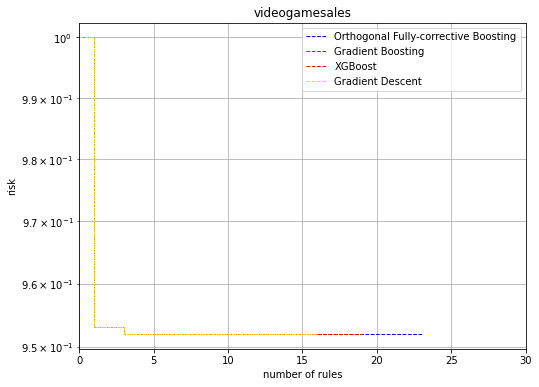

32.41651031894934
0:00:03.854606

0:00:03.816147

0:00:04.394668

0:00:04.206417

0:00:04.477161

orth_fc_Newton-CG: avg train risk: 0.015086404479008225 avg test risk 0.015433084191105942 &s: 14.66
0:00:03.665920

0:00:03.665187

0:00:03.680373

0:00:03.665224

0:00:03.690069

gpe_boosting_: avg train risk: 0.015569879462953271 avg test risk 0.01609551231250149 &s: 18.06
0:00:03.589335

0:00:03.611296

0:00:03.623997

0:00:03.593550

0:00:03.590842

xgb_keep_: avg train risk: 0.015571065046618631 avg test risk 0.016084064887462193 &s: 17.94
0:00:03.647403

0:00:03.675292

0:00:03.655155

0:00:03.650215

0:00:03.666988

mwg_boosting_: avg train risk: 0.01571605440025703 avg test risk 0.015831302669478627 &s: 10.84
orth_fc_Newton-CG auc: 1.4329165310521765
[1.0, 3.0, 5.2, 9.0, 12.0, 15.6, 19.4, 24.0, 27.4, 30.0] [0.01999512234187253, 0.01678050636896395, 0.015386317327148138, 0.014667591323558413, 0.01440918497944504, 0.014180610770629381, 0.014061584369231148, 0.013904548885796581, 0.0

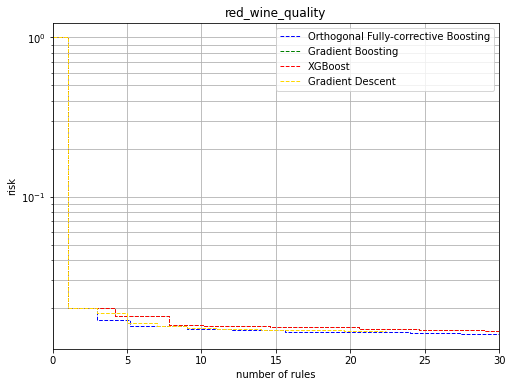

51.62076805721374
0:00:00.200093

0:00:00.208570

0:00:00.198139

0:00:00.199866

0:00:00.198175

orth_fc_Newton-CG: avg train risk: 0.0998407682065737 avg test risk 0.10436527229638207 &s: 13.7
0:00:00.223306

0:00:00.219548

0:00:00.226477

0:00:00.224285

0:00:00.230400

gpe_boosting_: avg train risk: 0.11463357278118995 avg test risk 0.11263060516476828 &s: 15.6
0:00:00.209295

0:00:00.202299

0:00:00.218078

0:00:00.204524

0:00:00.190864

xgb_keep_: avg train risk: 0.5866850110909516 avg test risk 0.6131746969413039 &s: 14.559999999999999
0:00:00.213403

0:00:00.214778

0:00:00.213783

0:00:00.217298

0:00:00.216310

mwg_boosting_: avg train risk: 0.1261498470117211 avg test risk 0.14437932836332742 &s: 13.34
orth_fc_Newton-CG auc: 4.8139876526291605
[2.4, 5.2, 7.4, 10.0, 12.4, 14.6, 17.4, 20.0, 22.4, 25.2] [0.25181403475037134, 0.1955907303980998, 0.146042615826145, 0.08277868312414075, 0.06316527868298148, 0.05769659272227308, 0.05407523945139327, 0.051795802263283605, 0.048146

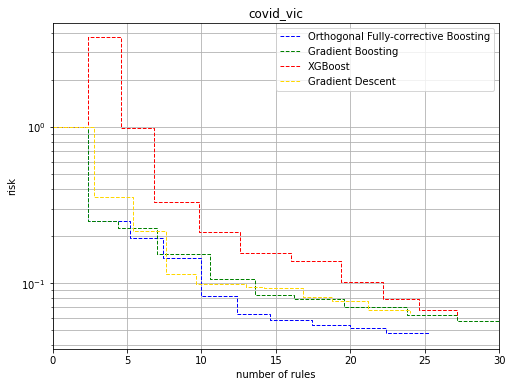

1082.8170359400497
0:00:00.348483

0:00:00.354112

0:00:00.353679

0:00:00.351340

0:00:00.358525

orth_fc_Newton-CG: avg train risk: 0.3151149644024819 avg test risk 0.4438947984488707 &s: 19.66
0:00:00.325401

0:00:00.322752

0:00:00.342554

0:00:00.321076

0:00:00.321734

gpe_boosting_: avg train risk: 0.3297056206499036 avg test risk 0.4507806175593302 &s: 20.68
0:00:00.307189

0:00:00.284767

0:00:00.279531

0:00:00.283585

0:00:00.321958

xgb_keep_: avg train risk: 6.15949909303293 avg test risk 14.999616449268823 &s: 19.64
0:00:00.332373

0:00:00.314342

0:00:00.329005

0:00:00.309780

0:00:00.308190

mwg_boosting_: avg train risk: 0.35077326455370617 avg test risk 0.44826810771349646 &s: 14.4
orth_fc_Newton-CG auc: 12.646219886267222
[4.2, 7.2, 10.6, 14.4, 17.4, 21.8, 24.6, 28.6, 32.0, 35.8] [0.5364849337775908, 0.34175088845214335, 0.3174005080778691, 0.2987221087004021, 0.28970983779002524, 0.2838985956980636, 0.2798654474817727, 0.27387333088733723, 0.26803529047837815, 0.26

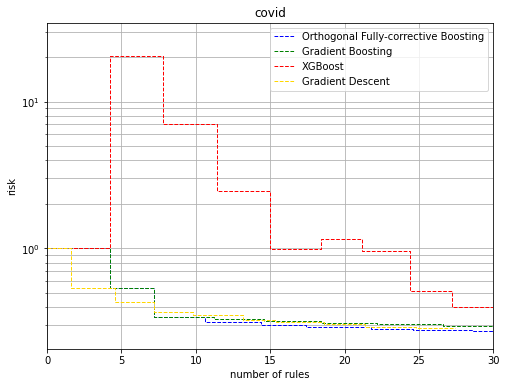

1076.416963882381
0:00:00.338872

0:00:00.334278

0:00:00.355649

0:00:00.337440

0:00:00.335288

orth_fc_Newton-CG: avg train risk: 0.26599332496312955 avg test risk 0.4024705730896649 &s: 21.46
0:00:00.343158

0:00:00.353709

0:00:00.348976

0:00:00.353750

0:00:00.374663

gpe_boosting_: avg train risk: 0.27415048066667874 avg test risk 0.39912738759946037 &s: 23.46
0:00:00.436738

0:00:00.521358

0:00:00.326150

0:00:00.312539

0:00:00.310777

xgb_keep_: avg train risk: 0.2955828890848696 avg test risk 0.3732209077223142 &s: 20.580000000000002
0:00:00.330510

0:00:00.332667

0:00:00.329640

0:00:00.331270

0:00:00.332829

mwg_boosting_: avg train risk: 0.3790498657350512 avg test risk 0.43244825649217694 &s: 14.219999999999999
orth_fc_Newton-CG auc: 11.92269583576077
[3.8, 7.2, 11.0, 15.4, 19.8, 23.8, 27.2, 31.4, 35.2, 39.8] [0.6518411092515803, 0.3445241089784702, 0.2895240930464116, 0.26217008153771815, 0.2350091567102129, 0.20900596884026762, 0.18540470039974155, 0.17196971549627

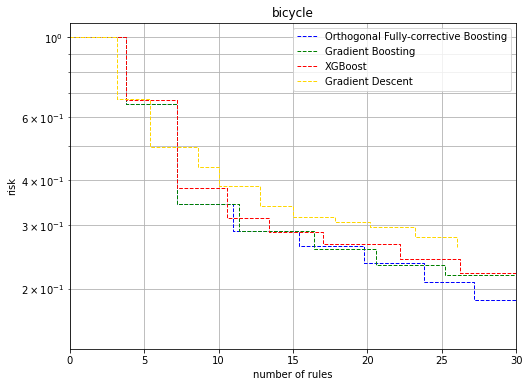

12.342277392898044
0:00:00.096820

0:00:00.104854

0:00:00.100386

0:00:00.111209

0:00:00.102490

orth_fc_Newton-CG: avg train risk: 0.09864172731180804 avg test risk 0.40510804053624805 &s: 17.759999999999998
0:00:00.116439

0:00:00.116527

0:00:00.131130

0:00:00.113365

0:00:00.117158

gpe_boosting_: avg train risk: 0.143728202125694 avg test risk 0.26381686052792896 &s: 18.22
0:00:00.081467

0:00:00.084687

0:00:00.086238

0:00:00.085115

0:00:00.082192

xgb_keep_: avg train risk: 125.19684658879278 avg test risk 156.61561326119272 &s: 16.96
0:00:00.106213

0:00:00.110515

0:00:00.112537

0:00:00.110992

0:00:00.112942

mwg_boosting_: avg train risk: 0.1618926836408376 avg test risk 0.2071864895416368 &s: 15.3
orth_fc_Newton-CG auc: 6.076637747323243
[3.0, 5.8, 9.8, 12.6, 16.0, 19.8, 22.8, 26.2, 29.0, 32.6] [0.26571780775704174, 0.22302319165225537, 0.15928367747223593, 0.09450462692759379, 0.06994757010821895, 0.05164172545905334, 0.040231992071702714, 0.031657615551498756, 0.027

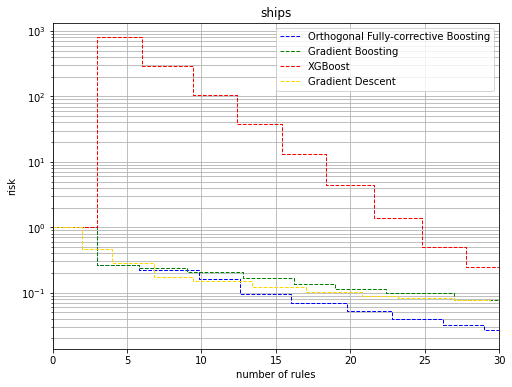

7.500299349437478
0:00:00.083183

0:00:00.088873

0:00:00.080154

0:00:00.082932

0:00:00.085685

orth_fc_Newton-CG: avg train risk: 0.08949606475323646 avg test risk 0.1817810020514841 &s: 14.819999999999999
0:00:00.096834

0:00:00.096827

0:00:00.093609

0:00:00.095714

0:00:00.093790

gpe_boosting_: avg train risk: 0.10026707091120968 avg test risk 0.19233110476613546 &s: 15.719999999999999
0:00:00.066260

0:00:00.063341

0:00:00.062461

0:00:00.064813

0:00:00.063015

xgb_keep_: avg train risk: 0.26214434275366555 avg test risk 0.3561855042486474 &s: 13.580000000000002
0:00:00.086273

0:00:00.090808

0:00:00.089978

0:00:00.085399

0:00:00.090117

mwg_boosting_: avg train risk: 0.12591637038917622 avg test risk 0.11901905003092694 &s: 12.459999999999999
orth_fc_Newton-CG auc: 4.329689554787045
[2.0, 4.0, 6.8, 9.6, 12.6, 15.8, 19.6, 22.8, 25.8, 29.2] [0.3032548393124188, 0.1805896649565109, 0.1099530107528138, 0.0764458727144386, 0.06536766632994827, 0.048910382669582746, 0.03561559

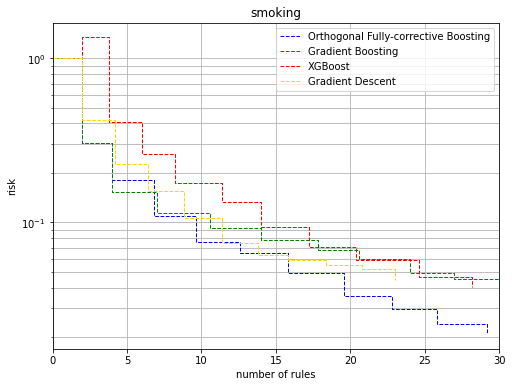

In [6]:
datasets = ['titanic','tic-tac-toe','iris','breast_cancer','load_wine','IBM_HR', 'telco_churn', 'GenderRecognition',
            'banknote', 'liver', 'magic', 'adult', 'digits5',
            'insurance','make_friedman1',
            'make_friedman2','make_friedman3','wage', 'Demographics','gdp','used_cars','load_diabetes',
            'boston','world_happiness_indicator', 'who_life_expectancy', 'mobile_prices', 'suicide_rates_cleaned',
            'videogamesales', 'red_wine_quality',
            'covid_vic','covid',
            'bicycle','ships','smoking']


values = [
    'mwg_boosting_',
    'gpe_boosting_', 
    'xgb_keep_', 
    'orth_fc_Newton-CG']
print(len(datasets))
cols = [10, 10, 10, 5, 6, 3, 4, 3, 10, 10, 5, 5, 3,
        10, 4, 10, 10, 10,
       2, 20, 10, 5, 4, 10, 5, 4, 3, 3, 5,
        10, 10, 10, 10, 10]
max_components = [30] * len(datasets)
max_components[11]=25
max_components[12]=20
max_components[5]=10
f = open("../analysis_results/compare_time20230416.csv", 'w')
f.write('dataset'+(','+','.join(values))*4+'\n')
for i in range(len(datasets)):
#     try:
        max_risk = get_max_risk(datasets[i])
        train, test, ands, aucs, rt = compare3(datasets[i], col=cols[i], max_length=max_components[i])
#         print(ands)
        f.write(datasets[i] + ',')
        for value in values:
            f.write(str(sum(train[value])/10)+',')
        for value in values:
            f.write(str(sum(test[value])/10)+',')
#         f.write('\n,')
        for value in values:
            f.write(str(max(ands[value]))+',')
        for value in values:
            f.write(str(aucs[value])+',')
        for value in values:
            f.write(str(rt[value])+',')
        f.write('\n')
#     except:
#         f.write('\n')
f.close()

function to get times

In [8]:
from matplotlib import pyplot as plt
from random import random

def compare4(dataset_name, max_risk=1, repeat=5, col=10, 
            max_length=30, title=None):
    test_risks={}
    train_risks={}
    and_counts={}
    aucs={}
    file_numbers={}
    desc=dataset_name
    max_risk=get_max_risk(dataset_name)
    print(max_risk)
    searches=['greedy']
    for search in searches:
        location='../experiment_output_20230413_'+search
        objs = ['mwg','gpe','xgb','orth']
        for obj in objs:
            algos = ['fc'] if obj=='orth' else ['boosting', 'fc'] if obj=='gpe' else ['keep']
            for algo in algos:
                methods = ['Newton-CG'] if algo=='fc' else ['']
                for method in methods:
                    done = True
                    fc_train=[0]*10
                    fc_test=[0]*10
                    ands = [0]*10
                    file_number=0
                    for i in range(repeat):
                        filename = dataset_name + '_' + obj + '_' + algo + '_' + method + '_realkd_col_' + \
                            str(col) + '_rep' + str(i) + '.txt'
                        try:
                            f = open(location+'/'+dataset_name+'/'+filename, 'r')
                            file_number+=1
                        except:
                            print(obj, algo, method,'does not exist: ')
                            print(location+'/'+dataset_name+'/'+filename)
                            continue
                        j=-1
                        for line in f:
                            if 'iteration ' in line:
                                j+=1
                            if j>=10:
                                break
                            words=line.split(' ')
                            if 'fc train risk' in line:
                                fc_train[j] += float(words[-1])
                            elif 'fc test risk' in line:
                                fc_test[j] += float(words[-1])
                            if 'if' in line:
                                ands[j]+=line.count('=')+1
                    if done:
                        file_numbers[search+'_'+obj + '_' + algo + '_' + method] = file_number
                        train_risks[search+'_'+obj + '_' + algo + '_' + method]=fc_train
                        test_risks[search+'_'+obj + '_' + algo + '_' + method]=fc_test
                        and_counts[search+'_'+obj + '_' + algo + '_' + method]=ands
                        if file_number==0:
                            continue
                        print(obj + '_' + algo + '_' + method+': avg train risk:',sum(fc_train)/10/max_risk/file_number, 
                              'avg test risk', sum(fc_test)/10/max_risk/file_number, '&s:', sum(ands)/10/file_number)

    rg=list(range(1,11))
    plt.figure(figsize=(8,6))
    colours = {}
    line_width = {}
    width = [1,1, 1, 1]*4
    i = 0
    colors=['blue','green','red','gold','deepskyblue','violet','cyan','brown','deepskyblue','purple', 'lime',
            'slategray','magenta','pink','olive','khaki']
    label_map={'greedy_gpe_boosting_':'Gradient Boosting', 'greedy_gpe_fc_Newton-CG': 'Gradient Fully-corrective Boosting', 
               'greedy_orth_fc_Newton-CG': 'Greedy Orthogonal Fully-corrective Boosting', 'xgb_keep_': 'XGBoost', 
              'xgb_fc_Newton-CG': 'XG Fully-corrective Boosting',
               'exhaustive_orth_fc_Newton-CG': 'Optimal Orthogonal Fully-corrective Boosting'
              }
    for item in train_risks:
        color = colors[i]
        colours[item] = color
        line_width[item] = width[i]
        i+=1
        if file_numbers[item]==0:
            continue
        train_risks[item] = [risk / max_risk/file_numbers[item] for risk in train_risks[item]]
        test_risks[item] = [risk / max_risk/file_numbers[item] for risk in test_risks[item]]
        and_counts[item] = [ands / file_numbers[item] for ands in and_counts[item]]
        aucs[item] = and_counts[item][0]+sum((train_risks[item][m])*
                                             (min(max_length, and_counts[item][m+1])-
                                                                   min(max_length, and_counts[item][m]))
                                for m in range(len(train_risks[item])-1))
        print(item, 'auc:', aucs[item])
        print(and_counts[item])
        plt.step([0]+and_counts[item], [1]+train_risks[item], '--', color=colours[item],
                 label=label_map[item],linewidth=line_width[item],where='post')
    plt.title(dataset_name if title is None else title + " risks")
    plt.xlabel('number of rules')
    plt.xlim(0,30)
    plt.ylabel('risk')
    plt.yscale('log')
    plt.grid(visible=True, which='major')
    plt.grid(visible=True, which='minor')
    plt.gca().set_ylim(bottom=0)
    plt.legend()
    plt.show()
    
    return train_risks, test_risks, and_counts, aucs

In [23]:
import numpy as np
import matplotlib.pyplot as plt
def plot_times(tic_gpes, tic_xgbs, tic_orths, tic_new_orths, tic_mwgs, savefile):
    tic_gpe_times=np.array([])
    tic_xgb_times=np.array([])
    tic_orth_times=np.array([])
    new_orth_times=np.array([])
    mwg_times = np.array([])
    for i in range(len(tic_orths)):
        tic_gpe_times = np.append(tic_gpe_times, hmstoseconds(tic_gpes[i]))
        tic_xgb_times = np.append(tic_xgb_times, hmstoseconds(tic_xgbs[i]))
        tic_orth_times = np.append(tic_orth_times, hmstoseconds(tic_orths[i]))
        new_orth_times = np.append(new_orth_times, hmstoseconds(tic_new_orths[i]))
        mwg_times = np.append(mwg_times, hmstoseconds(tic_mwgs[i]))
    tic_gpe_times_sum=np.cumsum(tic_gpe_times)
    tic_xgb_times_sum=np.cumsum(tic_xgb_times)
    tic_orth_times_sum=np.cumsum(tic_orth_times)
    new_orth_times_sum = np.cumsum(new_orth_times)
    mwg_times_sum = np.cumsum(mwg_times)
    print(tic_gpe_times_sum)
    rg=list(range(1, len(tic_orths)+1))
    plt.figure(figsize=(3.5,3.5))
    plt.plot(rg, mwg_times_sum, 'v-', label='Gradient Sum')
    plt.plot(rg, tic_gpe_times_sum, 'o-', label='Gradient Boosting')
    plt.plot(rg, tic_xgb_times_sum, '>-', label='XGBoost')
    plt.plot(rg, tic_orth_times_sum, '^-', label='Naive FCOGB')
    plt.plot(rg, new_orth_times_sum, 's-', label='FCOGB')
    plt.xlabel('number of rules')
#     plt.ylabel("time (seconds)")
    plt.legend()
    plt.grid()
    plt.savefig(savefile, bbox_inches = "tight") 

In [38]:
breast_gpe=['0:00:00.755056', '0:00:01.004230', '0:00:02.855858', '0:00:24.140140', '0:00:38.435723', '0:00:13.188960', '0:00:13.230922', '0:00:09.130535', '0:00:19.637853', '0:00:27.656477']
breast_xgb=['0:00:00.570690', '0:00:00.761002', '0:00:00.607723', '0:00:05.184244', '0:00:14.487850', '0:00:35.468122', '0:00:32.742045', '0:00:31.813855', '0:00:04.584688', '0:00:12.367203']
breast_orth=['0:00:00.475959', '0:00:00.852424', '0:00:05.586782', '0:00:33.590988', '0:00:45.237771', '0:00:43.558474', '0:01:01.536916', '0:01:08.900363', '0:01:08.325182', '0:01:03.280388']
breast_fast=['0:00:00.453358', '0:00:00.731647', '0:00:01.539592', '0:00:21.755362', '0:00:37.350054', '0:00:05.816117', '0:00:24.114822', '0:00:26.122812', '0:00:33.889967', '0:00:53.636361']
breast_mwg=['0:00:00.887125', '0:00:00.879971', '0:00:00.973911', '0:00:00.962496', '0:00:01.329237', '0:00:00.922350', '0:00:00.861245', '0:00:00.810215', '0:00:01.810805', '0:00:01.128920']

[  0.755056   1.759286   4.615144  28.755284  67.191007  80.379967
  93.610889 102.741424 122.379277 150.035754]


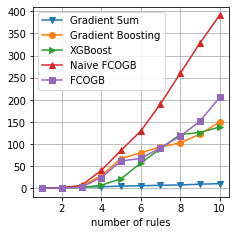

In [39]:
plot_times(breast_gpe, breast_xgb, breast_orth, breast_fast, breast_mwg, 'breast_time')

In [40]:
breast_gpe=['0:00:00.406505', '0:00:00.560280', '0:00:01.702461', '0:00:14.553819', '0:00:27.108825', '0:00:09.871768', '0:00:10.301562', '0:00:06.964814', '0:00:15.293720', '0:00:20.340739', '0:00:21.768332', '0:00:25.533367', '0:00:49.456761', '0:00:55.468829', '0:00:54.520400', '0:00:29.217624', '0:00:31.354829', '0:00:51.274517', '0:00:51.461184', '0:00:46.750567', '0:00:46.743888', '0:00:13.894905', '0:01:03.004780', '0:00:50.579376', '0:00:57.639416', '0:00:53.311267', '0:00:49.001205', '0:00:48.162377', '0:00:47.401490', '0:00:50.156078']
breast_xgb=['0:00:00.403796', '0:00:00.560904', '0:00:00.439962', '0:00:03.889207', '0:00:10.818655', '0:00:26.897559', '0:00:24.838816', '0:00:23.705041', '0:00:03.388681', '0:00:09.123499', '0:00:09.951643', '0:00:20.358218', '0:00:51.237772', '0:00:51.354723', '0:00:22.844702', '0:00:25.063935', '0:00:20.973246', '0:00:36.215483', '0:00:39.108032', '0:00:33.456499', '0:00:40.557702', '0:00:42.468474', '0:00:40.828234', '0:00:49.259070', '0:00:47.165758', '0:00:49.952720', '0:00:55.682319', '0:00:56.585145', '0:00:55.843562', '0:00:55.252382']
breast_orth=['0:00:00.483121', '0:00:02.132415', '0:00:11.981941', '0:01:43.854643', '0:01:58.801041', '0:02:09.068087', '0:03:31.150220', '0:03:39.652336', '0:01:08.032532', '0:01:24.159867', '0:02:13.884706', '0:01:37.463286', '0:06:18.941240', '0:06:28.689709', '0:06:27.578994', '0:02:41.389887', '0:07:01.275624', '0:01:01.985888', '0:06:50.597620', '0:07:38.523376', '0:08:42.834547', '0:06:36.588280', '0:07:22.511476', '0:06:24.612111', '0:06:46.804795', '0:07:05.643654', '0:06:03.904657', '0:06:58.027888', '0:06:40.555493', '0:05:59.557502']
breast_fast=['0:00:00.400968', '0:00:00.780109', '0:00:03.483080', '0:00:29.406922', '0:00:33.494007', '0:00:39.609077', '0:01:00.055821', '0:01:03.349703', '0:01:07.703431', '0:01:05.220681', '0:00:55.607666', '0:01:30.985464', '0:03:06.941522', '0:03:04.931654', '0:03:00.515616', '0:03:24.580357', '0:03:22.060183', '0:03:29.020018', '0:03:59.831680', '0:03:44.777336', '0:04:03.025658', '0:04:04.710815', '0:03:51.353551', '0:05:14.916452', '0:05:01.001751', '0:05:50.362021', '0:06:06.413271', '0:06:02.523277', '0:06:32.942329', '0:06:32.279807']
breast_mwg=['0:00:00.356508', '0:00:00.379050', '0:00:00.356466', '0:00:00.361820', '0:00:00.356925', '0:00:00.360640', '0:00:00.360583', '0:00:00.363663', '0:00:00.359436', '0:00:00.362724', '0:00:00.361838', '0:00:00.361417', '0:00:00.366286', '0:00:00.363237', '0:00:00.385227', '0:00:00.362971', '0:00:00.363618', '0:00:00.366301', '0:00:00.362654', '0:00:00.366871', '0:00:00.366345', '0:00:00.368137', '0:00:00.372855', '0:00:00.370632', '0:00:00.371798', '0:00:00.369534', '0:00:00.390336', '0:00:00.370717', '0:00:00.372341', '0:00:00.374486']

[4.06505000e-01 9.66785000e-01 2.66924600e+00 1.72230650e+01
 4.43318900e+01 5.42036580e+01 6.45052200e+01 7.14700340e+01
 8.67637540e+01 1.07104493e+02 1.28872825e+02 1.54406192e+02
 2.03862953e+02 2.59331782e+02 3.13852182e+02 3.43069806e+02
 3.74424635e+02 4.25699152e+02 4.77160336e+02 5.23910903e+02
 5.70654791e+02 5.84549696e+02 6.47554476e+02 6.98133852e+02
 7.55773268e+02 8.09084535e+02 8.58085740e+02 9.06248117e+02
 9.53649607e+02 1.00380568e+03]


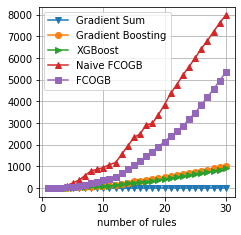

In [41]:
plot_times(breast_gpe, breast_xgb, breast_orth, breast_fast, breast_mwg, 'breast_time')

[0.275787 0.532643 0.790508 1.058243 1.335162 1.589159 1.841947 2.093031
 2.340618 2.602742]


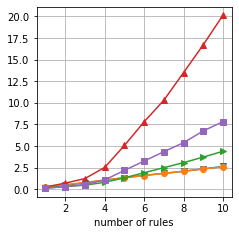

In [8]:
dia_gpe=['0:00:00.275787', '0:00:00.256856', '0:00:00.257865', '0:00:00.267735', '0:00:00.276919', '0:00:00.253997', '0:00:00.252788', '0:00:00.251084', '0:00:00.247587', '0:00:00.262124']
dia_xgb=['0:00:00.129437', '0:00:00.173532', '0:00:00.169680', '0:00:00.330890', '0:00:00.514597', '0:00:00.593593', '0:00:00.582354', '0:00:00.582483', '0:00:00.646505', '0:00:00.669529']
dia_orth=['0:00:00.261875', '0:00:00.442666', '0:00:00.531185', '0:00:01.282464', '0:00:02.543548', '0:00:02.734470', '0:00:02.499395', '0:00:03.194786', '0:00:03.223186', '0:00:03.424006' ]
dia_orth_new=['0:00:00.126477', '0:00:00.182577', '0:00:00.235198', '0:00:00.526444', '0:00:01.108148', '0:00:01.079305', '0:00:01.087228', '0:00:01.042202', '0:00:01.360436', '0:00:01.068484']
dia_mwg='0:00:00.199587', '0:00:00.265704', '0:00:00.279405', '0:00:00.310120', '0:00:00.269302', '0:00:00.283670', '0:00:00.225191', '0:00:00.240200', '0:00:00.285253', '0:00:00.273900'
plot_times(dia_gpe, dia_xgb, dia_orth, dia_orth_new, dia_mwg, 'diabete_time')

[ 0.10351   0.238297  0.362093  0.648121  1.062152  1.556763  2.020498
  2.484878  3.013081  3.548475  4.103591  4.603465  5.081789  5.693053
  6.307559  6.936564  7.526583  8.125106  8.771456  9.350271 10.025379
 10.712943 11.421596 12.119274 12.869998 13.598063 14.337923 15.078539
 15.845248 16.655191]


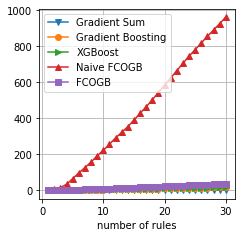

In [21]:
dia_gpe=['0:00:00.103510', '0:00:00.134787', '0:00:00.123796', '0:00:00.286028', '0:00:00.414031', 
         '0:00:00.494611', '0:00:00.463735', '0:00:00.464380', '0:00:00.528203', '0:00:00.535394',
         '0:00:00.555116', '0:00:00.499874', '0:00:00.478324', '0:00:00.611264', '0:00:00.614506', 
         '0:00:00.629005', '0:00:00.590019', '0:00:00.598523', '0:00:00.646350', '0:00:00.578815', 
         '0:00:00.675108', '0:00:00.687564', '0:00:00.708653', '0:00:00.697678', '0:00:00.750724', 
         '0:00:00.728065', '0:00:00.739860', '0:00:00.740616', '0:00:00.766709', '0:00:00.809943']
dia_xgb=['0:00:00.101476', '0:00:00.136520', '0:00:00.127229', '0:00:00.271208', '0:00:00.434594', 
         '0:00:00.536455', '0:00:00.487210', '0:00:00.487452', '0:00:00.554585', '0:00:00.553281', 
         '0:00:00.597681', '0:00:00.521175', '0:00:00.497266', '0:00:00.613167', '0:00:00.627746', '0:00:00.624210', '0:00:00.644485', '0:00:00.594139', '0:00:00.638265', '0:00:00.595829', '0:00:00.640615', '0:00:00.705630', '0:00:00.704075', '0:00:00.688187', '0:00:00.751316', '0:00:00.732259', '0:00:00.744667', '0:00:00.808221', '0:00:00.757735', '0:00:00.804032']
dia_orth=['0:00:02.248208', '0:00:03.615200', '0:00:08.224419', '0:00:18.746083', '0:00:31.232185', '0:00:31.703506', '0:00:29.931909', '0:00:30.305490', '0:00:34.990934', '0:00:30.405123', '0:00:33.671548', '0:00:35.727131', '0:00:30.296994', '0:00:32.239733', '0:00:35.501676', '0:00:38.951505', '0:00:35.336256', '0:00:39.319131', '0:00:40.709282', '0:00:39.862934', '0:00:41.079913', '0:00:40.367835', '0:00:40.874575', '0:00:39.474842', '0:00:36.500151', '0:00:37.366468', '0:00:36.644918', '0:00:35.158913', '0:00:35.704946', '0:00:35.908725']
dia_orth_new=['0:00:00.110631', '0:00:00.144323', '0:00:00.213029', '0:00:00.488463', '0:00:01.085711', '0:00:01.024487', '0:00:01.031993', '0:00:00.977741', '0:00:01.300586', '0:00:00.989023', '0:00:01.212845', '0:00:01.379231', '0:00:01.123314', '0:00:01.173396', '0:00:01.302149', '0:00:01.430413', '0:00:01.313681', '0:00:01.491008', '0:00:01.470904', '0:00:01.426336', '0:00:01.431963', '0:00:01.556189', '0:00:01.508243', '0:00:01.491381', '0:00:01.575082', '0:00:01.444517', '0:00:01.488305', '0:00:01.455150', '0:00:01.458984', '0:00:01.449798']
dia_mwg=['0:00:00.124338', '0:00:00.100532', '0:00:00.097210', '0:00:00.097764', '0:00:00.098303', '0:00:00.099054', '0:00:00.098812', '0:00:00.098764', '0:00:00.099961', '0:00:00.100772', '0:00:00.100206', '0:00:00.105040', '0:00:00.104563', '0:00:00.104328', '0:00:00.103112', '0:00:00.101332', '0:00:00.101725', '0:00:00.122865', '0:00:00.102822', '0:00:00.104142', '0:00:00.104866', '0:00:00.104308', '0:00:00.105029', '0:00:00.106711', '0:00:00.107707', '0:00:00.107743', '0:00:00.105426', '0:00:00.117043', '0:00:00.112494', '0:00:00.110970']
plot_times(dia_gpe, dia_xgb, dia_orth, dia_orth_new, dia_mwg, 'diabete_time')

[0.275787 0.532643 0.790508 1.058243 1.335162 1.589159 1.841947 2.093031
 2.340618 2.602742]


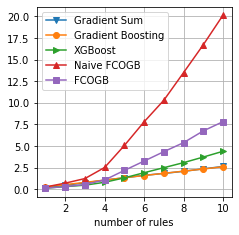

In [24]:
dia_gpe=['0:00:00.275787', '0:00:00.256856', '0:00:00.257865', '0:00:00.267735', '0:00:00.276919', '0:00:00.253997', '0:00:00.252788', '0:00:00.251084', '0:00:00.247587', '0:00:00.262124']
dia_xgb=['0:00:00.129437', '0:00:00.173532', '0:00:00.169680', '0:00:00.330890', '0:00:00.514597', '0:00:00.593593', '0:00:00.582354', '0:00:00.582483', '0:00:00.646505', '0:00:00.669529']
dia_orth=['0:00:00.261875', '0:00:00.442666', '0:00:00.531185', '0:00:01.282464', '0:00:02.543548', '0:00:02.734470', '0:00:02.499395', '0:00:03.194786', '0:00:03.223186', '0:00:03.424006' ]
dia_orth_new=['0:00:00.126477', '0:00:00.182577', '0:00:00.235198', '0:00:00.526444', '0:00:01.108148', '0:00:01.079305', '0:00:01.087228', '0:00:01.042202', '0:00:01.360436', '0:00:01.068484']
dia_mwg='0:00:00.199587', '0:00:00.265704', '0:00:00.279405', '0:00:00.310120', '0:00:00.269302', '0:00:00.283670', '0:00:00.225191', '0:00:00.240200', '0:00:00.285253', '0:00:00.273900'
plot_times(dia_gpe, dia_xgb, dia_orth, dia_orth_new, dia_mwg, 'diabete_time')

In [70]:
import numpy as np
import matplotlib.pyplot as plt
def plot_times_comp(tic_gpes, tic_xgbs, tic_orths, tic_new_orths, tic_mwgs, comp_gpe, comp_xgb, 
                    comp_orth, comp_new_orth, comp_mwg,savefile, show_label=False):
    tic_gpe_times=np.array([])
    tic_xgb_times=np.array([])
    tic_orth_times=np.array([])
    new_orth_times=np.array([])
    mwg_times = np.array([])
    for i in range(len(tic_gpes)):
        tic_gpe_times = np.append(tic_gpe_times, hmstoseconds(tic_gpes[i]))
    for i in range(len(tic_xgbs)):
        tic_xgb_times = np.append(tic_xgb_times, hmstoseconds(tic_xgbs[i]))
    for i in range(len(tic_orths)):
        tic_orth_times = np.append(tic_orth_times, hmstoseconds(tic_orths[i]))
        new_orth_times = np.append(new_orth_times, hmstoseconds(tic_new_orths[i]))
    for i in range(len(tic_mwgs)):
        mwg_times = np.append(mwg_times, hmstoseconds(tic_mwgs[i]))
    tic_gpe_times_sum=np.cumsum(tic_gpe_times)
    tic_xgb_times_sum=np.cumsum(tic_xgb_times)
    tic_orth_times_sum=np.cumsum(tic_orth_times)
    new_orth_times_sum = np.cumsum(new_orth_times)
    mwg_times_sum = np.cumsum(mwg_times)
    plt.figure(figsize=(3.5,3.5))
    plt.plot(comp_mwg, mwg_times_sum[:len(comp_mwg)], 'v-', label='Gradient Sum')
    plt.plot(comp_gpe, tic_gpe_times_sum[:len(comp_gpe)], 'o-', label='Gradient Boosting')
    plt.plot(comp_xgb, tic_xgb_times_sum[:len(comp_xgb)], '>-', label='XGBoost')
    plt.plot(comp_orth, tic_orth_times_sum[:len(comp_orth)], '^-', label='Naive FCOGB')
    plt.plot(comp_new_orth, new_orth_times_sum[:len(comp_new_orth)], 's-', label='FCOGB')
    plt.xlabel('cognitive complexity')
    plt.xlim([0,40])
    if show_label:
        plt.ylabel("time (seconds)")
        plt.legend()
    plt.grid()
    plt.savefig(savefile, bbox_inches = "tight") 

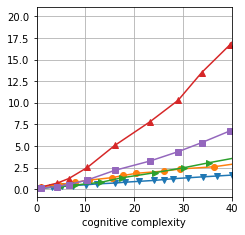

In [75]:
dia_gpe_comp=[1.0, 4.6, 7.8, 10.8, 15.4, 17.8, 20.4, 26.0, 29.4,36.4, 43.4]
dia_xgb_comp=[1.0, 4.8, 7.8, 13.2, 17.4, 24.2, 30.2, 35.4, 41.6]
dia_orth_comp=[1.0, 4.2, 6.6, 10.4, 16.0, 23.2, 29.0, 33.8, 39.6, 44.6]
dia_orth_new_comp=[1.0, 4.2, 6.6, 10.4, 16.0, 23.2, 29.0, 33.8, 39.6, 44.6]
dia_mwg_comp=[1.0, 3.2, 5.2, 7.4, 10.2, 12.4, 16.0, 18.2, 21.0, 24.0, 26.0,28.0,31.0,34.0, 37.0, 40.0]
dia_gpe=['0:00:00.275787', '0:00:00.256856', '0:00:00.257865', '0:00:00.267735', '0:00:00.276919', '0:00:00.253997', '0:00:00.252788', '0:00:00.251084', '0:00:00.247587', '0:00:00.262124', '0:00:00.555116']
dia_xgb=['0:00:00.129437', '0:00:00.173532', '0:00:00.169680', '0:00:00.330890', '0:00:00.514597', '0:00:00.593593', '0:00:00.582354', '0:00:00.582483', '0:00:00.646505', '0:00:00.669529']
dia_orth=['0:00:00.261875', '0:00:00.442666', '0:00:00.531185', '0:00:01.282464', '0:00:02.543548', '0:00:02.734470', '0:00:02.499395', '0:00:03.194786', '0:00:03.223186', '0:00:03.424006' ]
dia_orth_new=['0:00:00.126477', '0:00:00.182577', '0:00:00.235198', '0:00:00.526444', '0:00:01.108148', '0:00:01.079305', '0:00:01.087228', '0:00:01.042202', '0:00:01.360436', '0:00:01.068484']
dia_mwg=['0:00:00.124338', '0:00:00.100532', '0:00:00.097210', '0:00:00.097764', '0:00:00.098303', '0:00:00.099054', '0:00:00.098812', '0:00:00.098764', '0:00:00.099961', '0:00:00.100772', '0:00:00.100206', '0:00:00.105040', '0:00:00.104563', '0:00:00.104328', '0:00:00.103112', '0:00:00.101332', '0:00:00.101725', '0:00:00.122865', '0:00:00.102822', '0:00:00.104142', '0:00:00.104866', '0:00:00.104308', '0:00:00.105029', '0:00:00.106711', '0:00:00.107707', '0:00:00.107743', '0:00:00.105426', '0:00:00.117043', '0:00:00.112494', '0:00:00.110970']
plot_times_comp(dia_gpe, dia_xgb, dia_orth, dia_orth_new, dia_mwg, dia_gpe_comp, dia_xgb_comp, dia_orth_comp, 
                dia_orth_new_comp, dia_mwg_comp, 'diabete_time_comp.pdf', show_label=False)

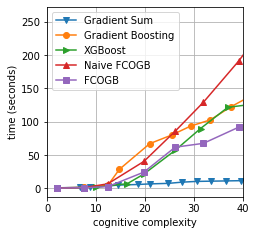

In [76]:
breast_gpe_comp=[2.0, 7.6, 12.4, 14.8, 21.0, 25.6, 29.4, 33.4, 37.6, 44.6]
breast_xgb_comp=[2.0, 7.6, 10.0, 16.4, 19.8, 26.2, 31.4, 37.0, 42.0]
breast_orth_comp=[2.0, 7.6, 12.4, 19.8, 26.2, 32.0, 39.2, 46.2]
breast_orth_new_comp=[2.0, 7.6, 12.4, 19.8, 26.2, 32.0, 39.2, 46.2]
breast_mwg_comp=[2.0, 6.8, 8.8, 12.4, 14.4, 18.6, 21.0, 24.8, 27.6, 30.6,33.6,36.6,39.6,44.6]
breast_gpe=['0:00:00.755056', '0:00:01.004230', '0:00:02.855858', '0:00:24.140140', '0:00:38.435723', '0:00:13.188960', '0:00:13.230922', '0:00:09.130535', '0:00:19.637853', '0:00:27.656477', '0:00:21.768332', '0:00:25.533367', '0:00:49.456761', '0:00:55.468829']
breast_xgb=['0:00:00.570690', '0:00:00.761002', '0:00:00.607723', '0:00:05.184244', '0:00:14.487850', '0:00:35.468122', '0:00:32.742045', '0:00:31.813855', '0:00:04.584688', '0:00:12.367203', '0:00:09.951643', '0:00:20.358218', '0:00:51.237772', '0:00:51.354723']
breast_orth=['0:00:00.475959', '0:00:00.852424', '0:00:05.586782', '0:00:33.590988', '0:00:45.237771', '0:00:43.558474', '0:01:01.536916', '0:01:08.900363', '0:01:08.325182', '0:01:03.280388', '0:02:13.884706', '0:01:37.463286', '0:06:18.941240', '0:06:28.689709']
breast_fast=['0:00:00.453358', '0:00:00.731647', '0:00:01.539592', '0:00:21.755362', '0:00:37.350054', '0:00:05.816117', '0:00:24.114822', '0:00:26.122812', '0:00:33.889967', '0:00:53.636361', '0:00:55.607666', '0:01:30.985464', '0:03:06.941522', '0:03:04.931654']
breast_mwg=['0:00:00.887125', '0:00:00.879971', '0:00:00.973911', '0:00:00.962496', '0:00:01.329237', '0:00:00.922350', '0:00:00.861245', '0:00:00.810215', '0:00:01.810805', '0:00:01.128920', '0:00:00.361838', '0:00:00.361417', '0:00:00.366286', '0:00:00.363237']
# breast_gpe=['0:00:00.406505', '0:00:00.560280', '0:00:01.702461', '0:00:14.553819', '0:00:27.108825', '0:00:09.871768', '0:00:10.301562', '0:00:06.964814', '0:00:15.293720', '0:00:20.340739', '0:00:21.768332', '0:00:25.533367', '0:00:49.456761', '0:00:55.468829', '0:00:54.520400', '0:00:29.217624', '0:00:31.354829', '0:00:51.274517', '0:00:51.461184', '0:00:46.750567', '0:00:46.743888', '0:00:13.894905', '0:01:03.004780', '0:00:50.579376', '0:00:57.639416', '0:00:53.311267', '0:00:49.001205', '0:00:48.162377', '0:00:47.401490', '0:00:50.156078']
# breast_xgb=['0:00:00.403796', '0:00:00.560904', '0:00:00.439962', '0:00:03.889207', '0:00:10.818655', '0:00:26.897559', '0:00:24.838816', '0:00:23.705041', '0:00:03.388681', '0:00:09.123499', '0:00:09.951643', '0:00:20.358218', '0:00:51.237772', '0:00:51.354723', '0:00:22.844702', '0:00:25.063935', '0:00:20.973246', '0:00:36.215483', '0:00:39.108032', '0:00:33.456499', '0:00:40.557702', '0:00:42.468474', '0:00:40.828234', '0:00:49.259070', '0:00:47.165758', '0:00:49.952720', '0:00:55.682319', '0:00:56.585145', '0:00:55.843562', '0:00:55.252382']
# breast_orth=['0:00:00.483121', '0:00:02.132415', '0:00:11.981941', '0:01:43.854643', '0:01:58.801041', '0:02:09.068087', '0:03:31.150220', '0:03:39.652336', '0:01:08.032532', '0:01:24.159867', '0:02:13.884706', '0:01:37.463286', '0:06:18.941240', '0:06:28.689709', '0:06:27.578994', '0:02:41.389887', '0:07:01.275624', '0:01:01.985888', '0:06:50.597620', '0:07:38.523376', '0:08:42.834547', '0:06:36.588280', '0:07:22.511476', '0:06:24.612111', '0:06:46.804795', '0:07:05.643654', '0:06:03.904657', '0:06:58.027888', '0:06:40.555493', '0:05:59.557502']
# breast_fast=['0:00:00.400968', '0:00:00.780109', '0:00:03.483080', '0:00:29.406922', '0:00:33.494007', '0:00:39.609077', '0:01:00.055821', '0:01:03.349703', '0:01:07.703431', '0:01:05.220681', '0:00:55.607666', '0:01:30.985464', '0:03:06.941522', '0:03:04.931654', '0:03:00.515616', '0:03:24.580357', '0:03:22.060183', '0:03:29.020018', '0:03:59.831680', '0:03:44.777336', '0:04:03.025658', '0:04:04.710815', '0:03:51.353551', '0:05:14.916452', '0:05:01.001751', '0:05:50.362021', '0:06:06.413271', '0:06:02.523277', '0:06:32.942329', '0:06:32.279807']
# breast_mwg=['0:00:00.356508', '0:00:00.379050', '0:00:00.356466', '0:00:00.361820', '0:00:00.356925', '0:00:00.360640', '0:00:00.360583', '0:00:00.363663', '0:00:00.359436', '0:00:00.362724', '0:00:00.361838', '0:00:00.361417', '0:00:00.366286', '0:00:00.363237', '0:00:00.385227', '0:00:00.362971', '0:00:00.363618', '0:00:00.366301', '0:00:00.362654', '0:00:00.366871', '0:00:00.366345', '0:00:00.368137', '0:00:00.372855', '0:00:00.370632', '0:00:00.371798', '0:00:00.369534', '0:00:00.390336', '0:00:00.370717', '0:00:00.372341', '0:00:00.374486']
plot_times_comp(breast_gpe, breast_xgb, breast_orth, breast_fast, breast_mwg, breast_gpe_comp, breast_xgb_comp, breast_orth_comp,
           breast_orth_new_comp, breast_mwg_comp,'breast_time_comp.pdf', show_label=True)